In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt 
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
X=x_test

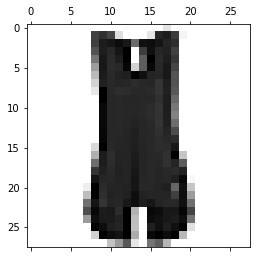

In [ ]:
plt.matshow(x_train[4],cmap=plt.cm.binary)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


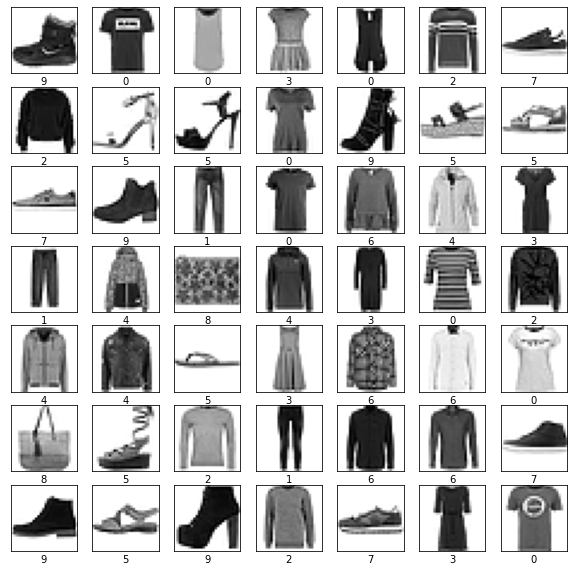

In [ ]:
plt.figure(figsize=(10,10))
for i in range(49):
  plt.subplot(7,7,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)     
                          #ảnh trắng đen
  plt.xlabel(y_train[i])   #lớp thứ
plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_test/=255
x_train/=255

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,10)    # 10 lớp
y_test=to_categorical(y_test,10)

In [ ]:

from keras.models import  Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten

model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(28,28,1)))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

In [ ]:
#from tensorflow.keras.optimizers import SGD
#opt = SGD(lr=0.01, momentum=0.9)   #Tỷ lệ học tập. Mặc định là 0,01, 
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)
import keras 
#categorical_crossentropy: chéo phân loai
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=opt,metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# liên kết driver
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
history=model.fit(x_train,y_train,epochs=50, validation_data=(x_test,y_test),batch_size=64,verbose=1)


Epoch 1/50
938/938 [==============================] - 13s 13ms/step - loss: 0.5792 - accuracy: 0.7876 - val_loss: 0.3808 - val_accuracy: 0.8591
Epoch 2/50
938/938 [==============================] - 12s 12ms/step - loss: 0.3849 - accuracy: 0.8579 - val_loss: 0.3342 - val_accuracy: 0.8776
Epoch 3/50
938/938 [==============================] - 12s 13ms/step - loss: 0.3329 - accuracy: 0.8785 - val_loss: 0.2986 - val_accuracy: 0.8905
Epoch 4/50
938/938 [==============================] - 12s 12ms/step - loss: 0.3000 - accuracy: 0.8879 - val_loss: 0.2737 - val_accuracy: 0.8993
Epoch 5/50
938/938 [==============================] - 12s 12ms/step - loss: 0.2764 - accuracy: 0.8977 - val_loss: 0.2704 - val_accuracy: 0.8998
Epoch 6/50
938/938 [==============================] - 12s 13ms/step - loss: 0.2608 - accuracy: 0.9036 - val_loss: 0.2624 - val_accuracy: 0.9045
Epoch 7/50
938/938 [==============================] - 12s 12ms/step - loss: 0.2452 - accuracy: 0.9089 - val_loss: 0.2431 - val_accuracy:

In [ ]:
# save model
model.save('/content/drive/MyDrive/Colab Notebooks/model_CNN_fashion_mnist.h5')
#model.save_weights('/content/drive/MyDrive/Colab Notebooks/model_CNN_weights_mnist.h5')

In [ ]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/model_CNN_fashion_mnist.h5')

In [ ]:
# độ chính xác
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0)
print(f'test_acc: {test_acc*100}') 

test_acc: 92.65999794006348


# thử với tâp test

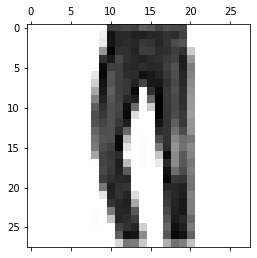

In [ ]:
plt.matshow(X[5],cmap=plt.cm.binary)

In [ ]:
import numpy as np
y_predicted = model.predict(x_test)
np.argmax(y_predicted[5])

1

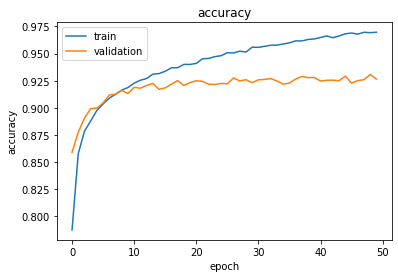

In [ ]:
# biểu đồ biểu thị độ chính xác
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

# mẫu ngoài

In [ ]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:15]

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 2]

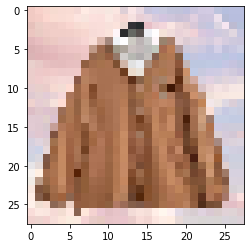

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img=load_img('ao_khoac.jpg',target_size=(28,28,1))
plt.imshow(img)

In [ ]:
img=img_to_array(img)  # tạo mảng
img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1,28,28,1)
img=img.astype('float32')
img=img/255
import numpy as np

print(names[np.argmax(model.predict(img))])

array([8])